<a href="https://colab.research.google.com/github/mochammadcholilurrokhman/PCVK_Ganjil_Mochammad-Cholilur-Rokhman/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MODUL11 – MetodeDeteksiObjek: TemplateMatching,EdgeDetection,CornerDetection,GridDetection,ContourDetection

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama“Week11.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
cara sebagai berikut.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt

2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

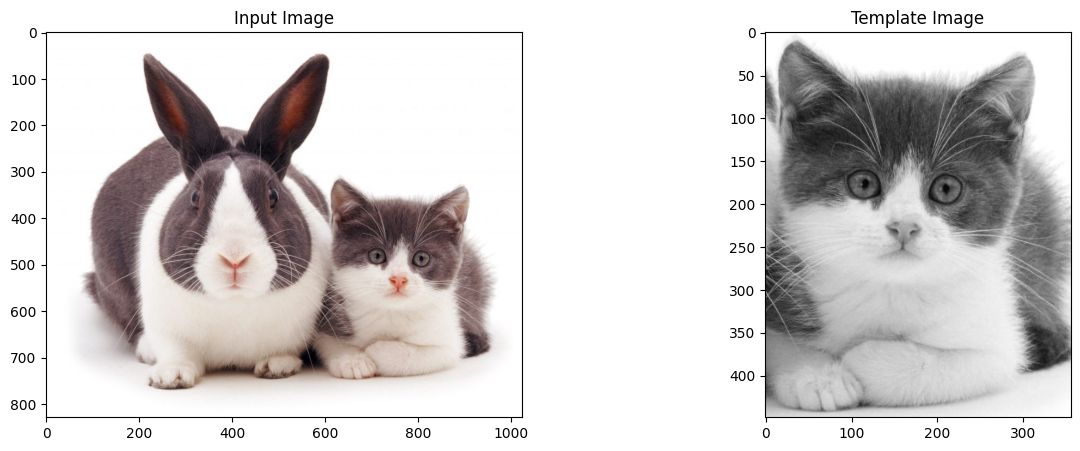

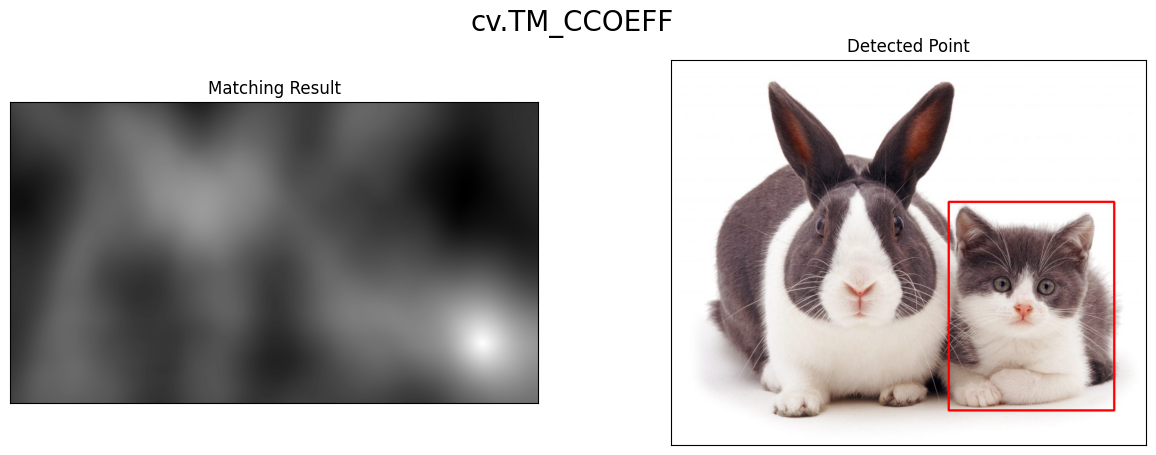

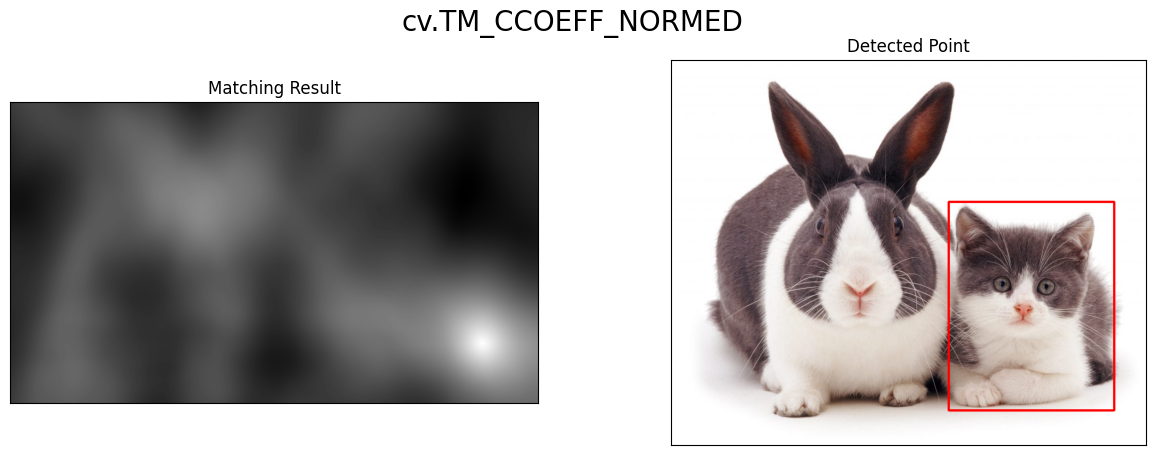

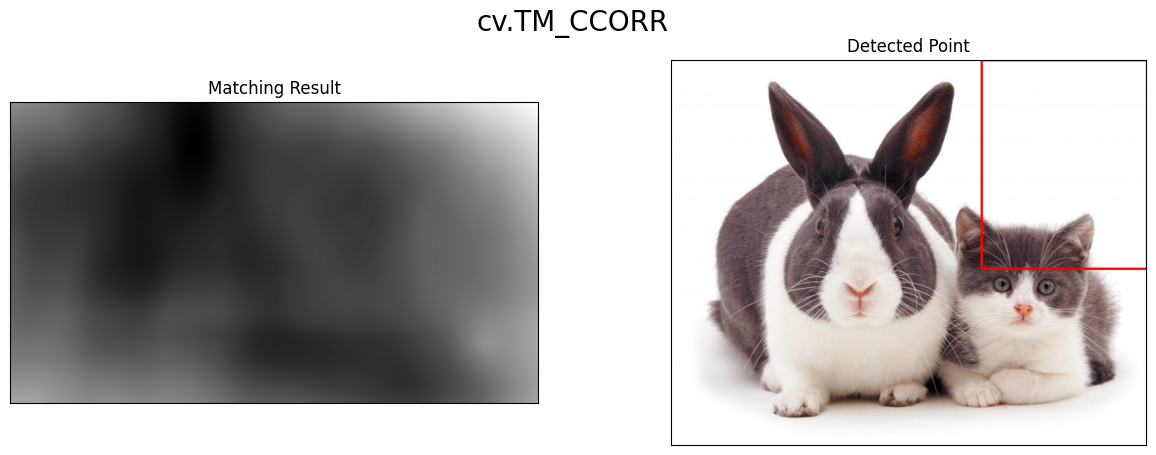

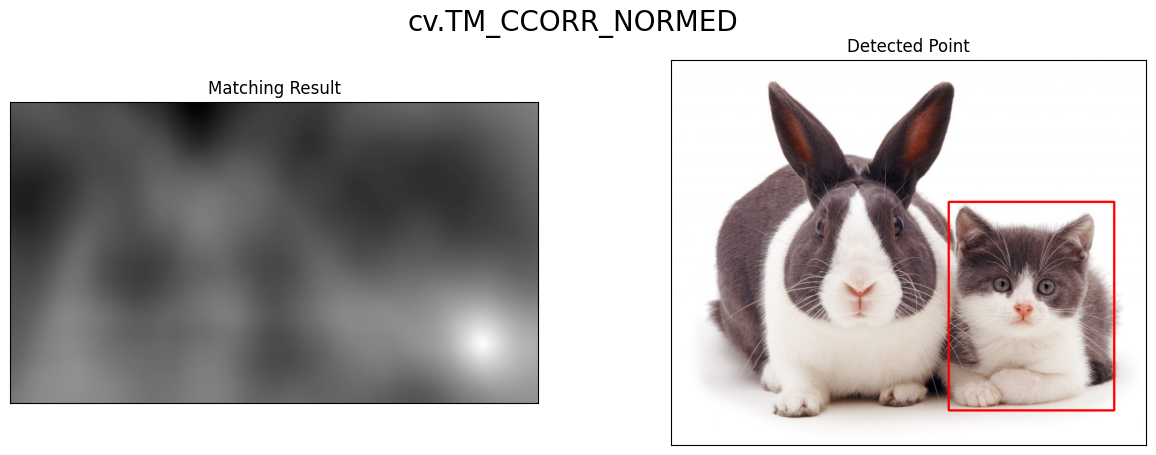

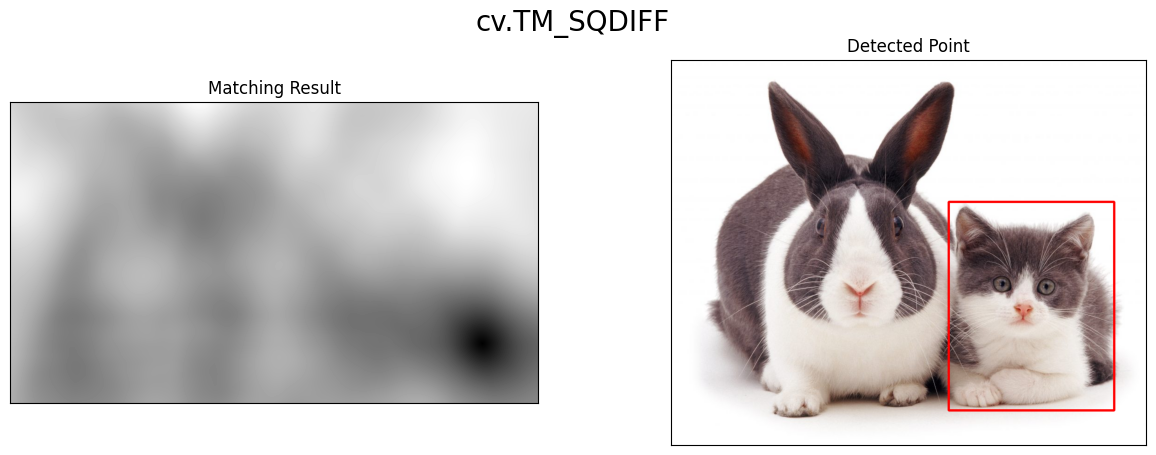

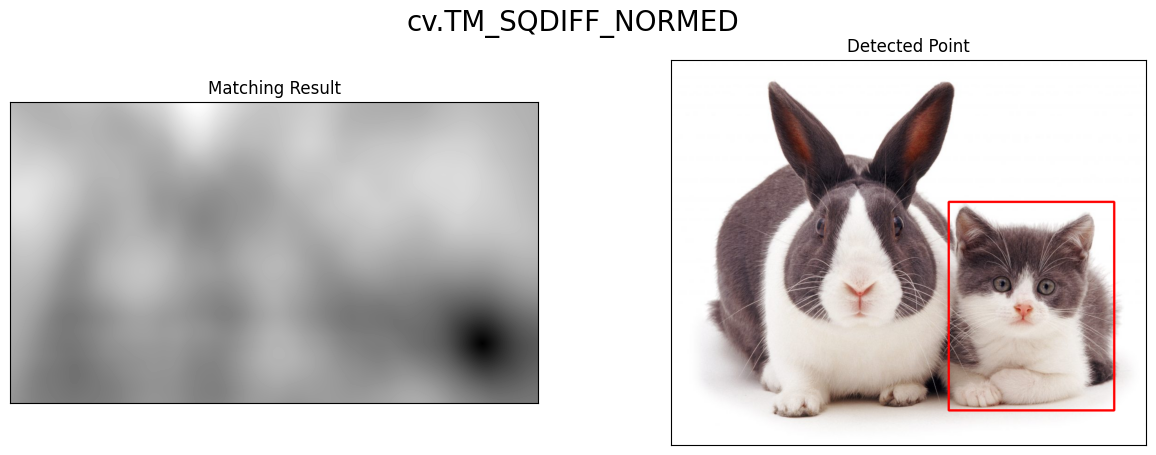

In [3]:
# Load and resize the input image
img = cv.imread('/content/drive/MyDrive/PCVK/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img2 = img.copy()

# Load the template image
template = cv.imread('/content/drive/MyDrive/PCVK/cat2_templatejpg.jpg', 0)
w, h = template.shape[::-1]

# Plot input and template images
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axarr[0].set_title("Input Image")
axarr[1].imshow(template, cmap='gray')
axarr[1].set_title("Template Image")

# Methods for template matching
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
           'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# Perform template matching for each method
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    res = cv.matchTemplate(img_gray, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # Determine top-left corner based on matching method
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Draw rectangle on the matched region
    cv.rectangle(img, top_left, bottom_right, (0, 0, 255), 3)

    # Display results
    plt.figure(figsize=(15, 5))
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth, fontsize=20)
    plt.show()


3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut:

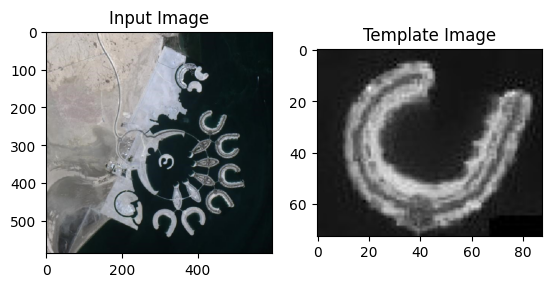

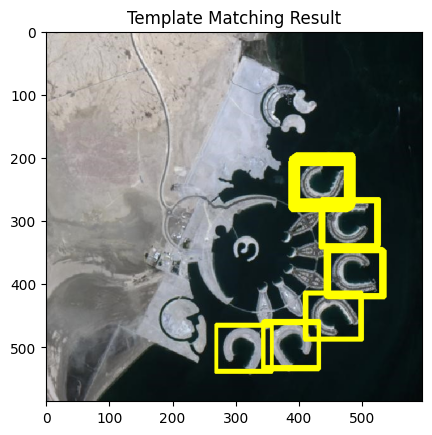

In [4]:
img = cv.imread('/content/drive/MyDrive/PCVK/bahrain.jpg')

# Convert the main image to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

template = cv.imread('/content/drive/MyDrive/PCVK/bahrain-template.jpg', cv.IMREAD_GRAYSCALE)

# Display the input image
plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Input Image')

# Display the template image
plt.subplot(122)
plt.imshow(template, cmap='gray')
plt.title('Template Image')

# Perform template matching
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray, template, cv.TM_CCOEFF_NORMED)

# Define the threshold for template matching
threshold = 0.43

# Locate the positions where the template matches the image above the threshold
loc = np.where(res >= threshold)

# Draw rectangles around the matched templates
for pt in zip(*loc[::-1]):
    cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)

# Display the template matching result
plt.figure()  # Create a new figure
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Template Matching Result')

plt.show()

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut: <br>
    a. Sobel Edge Detection <br>
    b. Canny Edge Detection <br>
    c. Laplacian Edge Detection

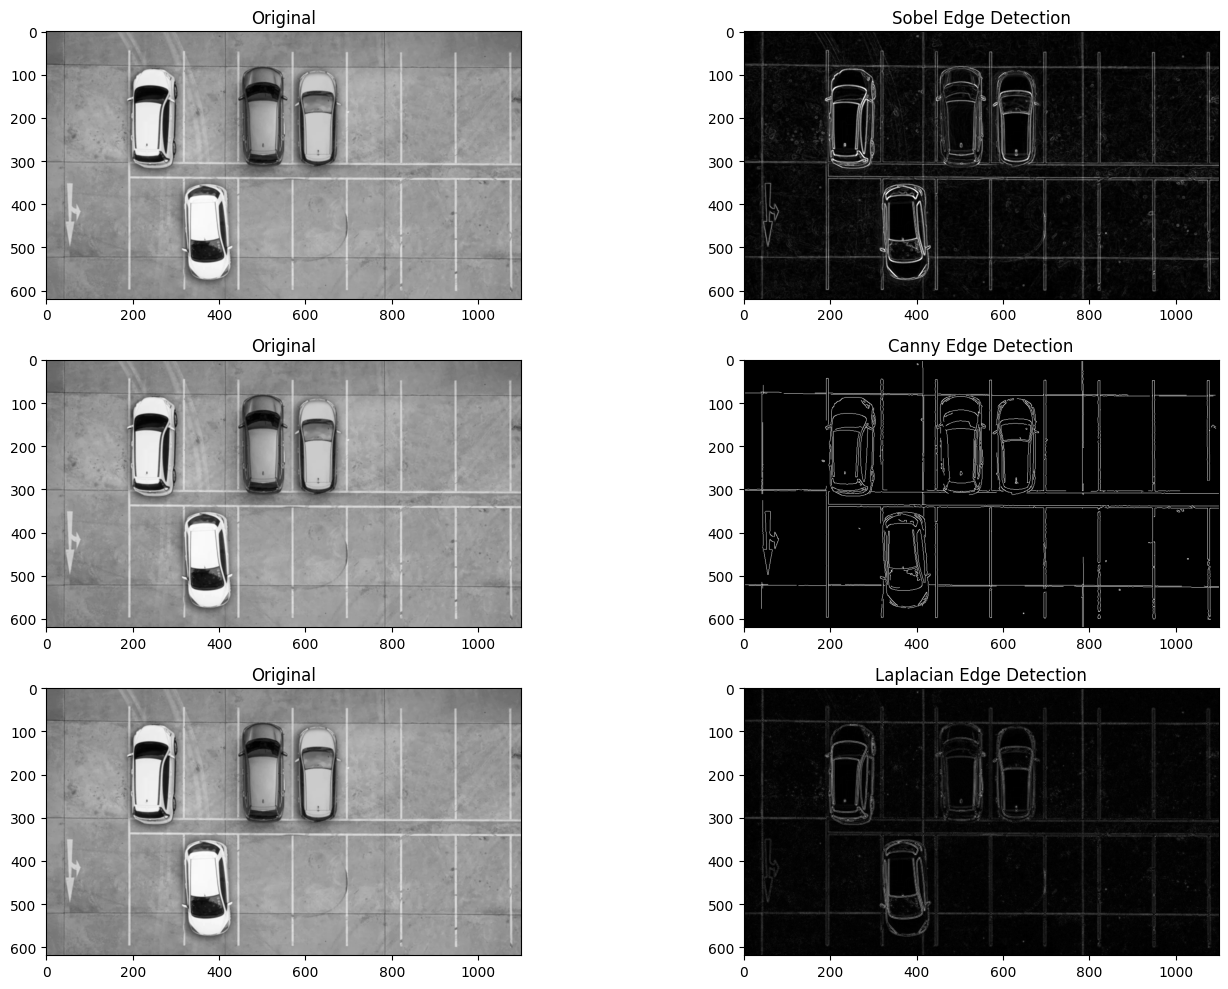

In [5]:
img = cv.imread('/content/drive/MyDrive/PCVK/car-park.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.GaussianBlur(gray, (3, 3), 0)

img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

edges_canny = cv.Canny(img, 100, 200)

img_laplacian = cv.Laplacian(img, cv.CV_64F)
img_laplacian = cv.convertScaleAbs(img_laplacian)

# Create a figure with a 3x2 grid for subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Display the original image and Sobel edge detection
axes[0, 0].imshow(img, cmap='gray', aspect='equal')
axes[0, 0].set_title('Original')

axes[0, 1].imshow(img_sobelxy, cmap='gray', aspect='equal')
axes[0, 1].set_title('Sobel Edge Detection')

# Display the original image and Canny edge detection
axes[1, 0].imshow(img, cmap='gray', aspect='equal')
axes[1, 0].set_title('Original')

axes[1, 1].imshow(edges_canny, cmap='gray', aspect='equal')
axes[1, 1].set_title('Canny Edge Detection')

# Display the original image and Laplacian edge detection
axes[2, 0].imshow(img, cmap='gray', aspect='equal')
axes[2, 0].set_title('Original')

axes[2, 1].imshow(img_laplacian, cmap='gray', aspect='equal')
axes[2, 1].set_title('Laplacian Edge Detection')

plt.tight_layout()
plt.show()

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut: <br>
    a. Harris Corner Detection <br>
    b. Shi-Tomasi Detection <br>


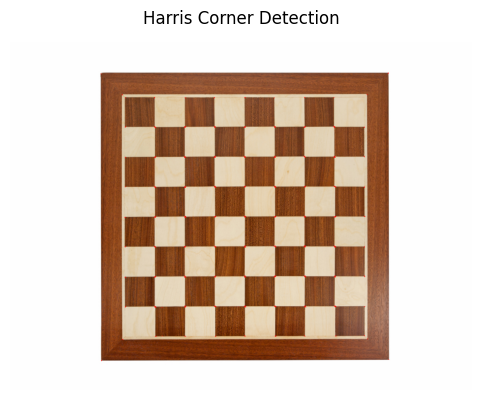

In [6]:
img = cv.imread('/content/drive/MyDrive/PCVK/chess-board.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Deteksi sudut menggunakan metode Harris
corner_harris = cv.cornerHarris(gray, 2, 3, 0.04)

# Ambil nilai sudut yang cukup besar (threshold)
threshold = 0.01 * corner_harris.max()
img[corner_harris > threshold] = [0, 0, 255]  # Ubah sudut yang dideteksi menjadi warna merah

# Tampilkan hasil Harris Corner Detection
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

<ipython-input-7-b281cf0a805e>:7: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


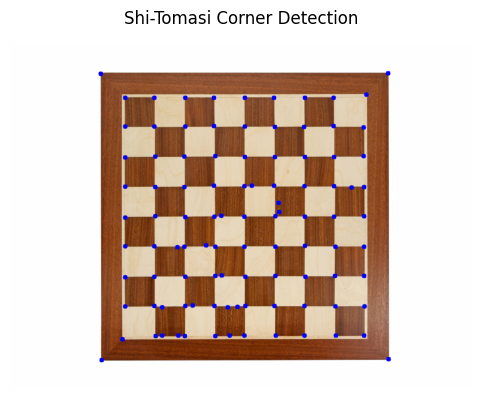

In [7]:
# Baca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/chess-board.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Deteksi sudut menggunakan metode Shi-Tomasi
corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)

# Gambar sudut pada gambar
for corner in corners:
    x, y = corner.ravel()
    cv.circle(img, (x, y), 5, 255, -1)

# Tampilkan hasil Shi-Tomasi Corner Detection
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')
plt.show()

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut:

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


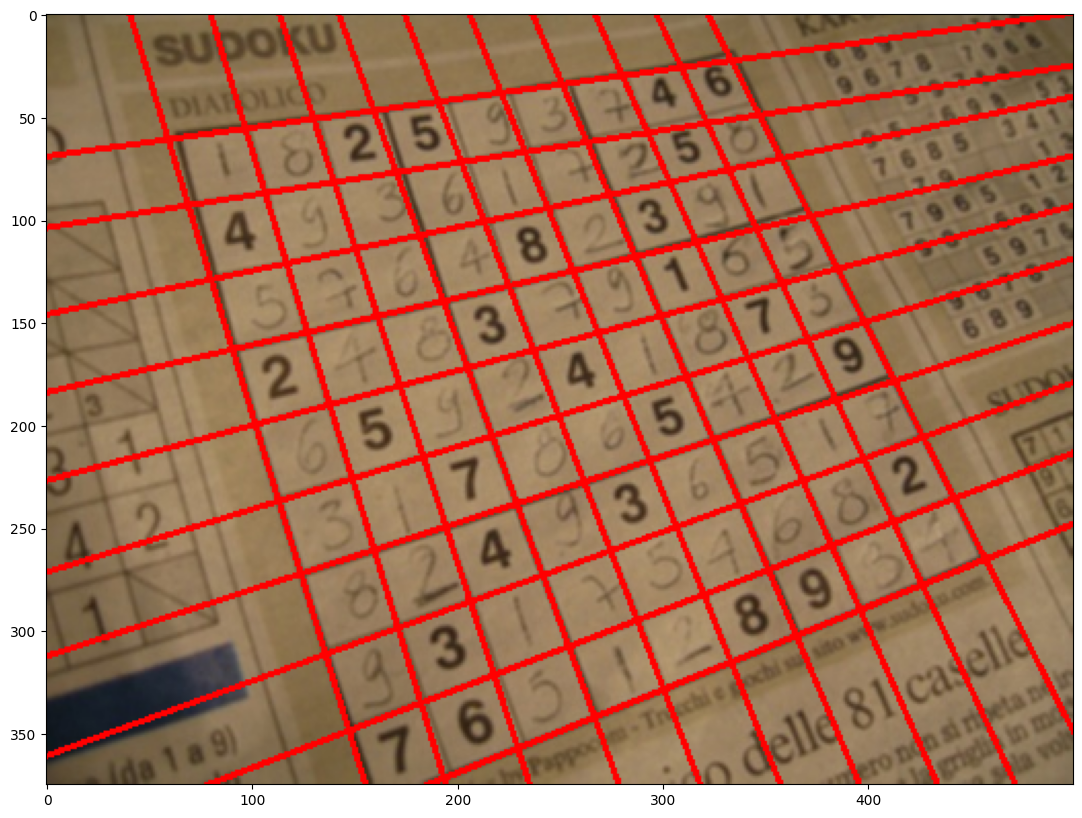

In [8]:
img = cv.imread('/content/drive/MyDrive/PCVK/sudoku.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

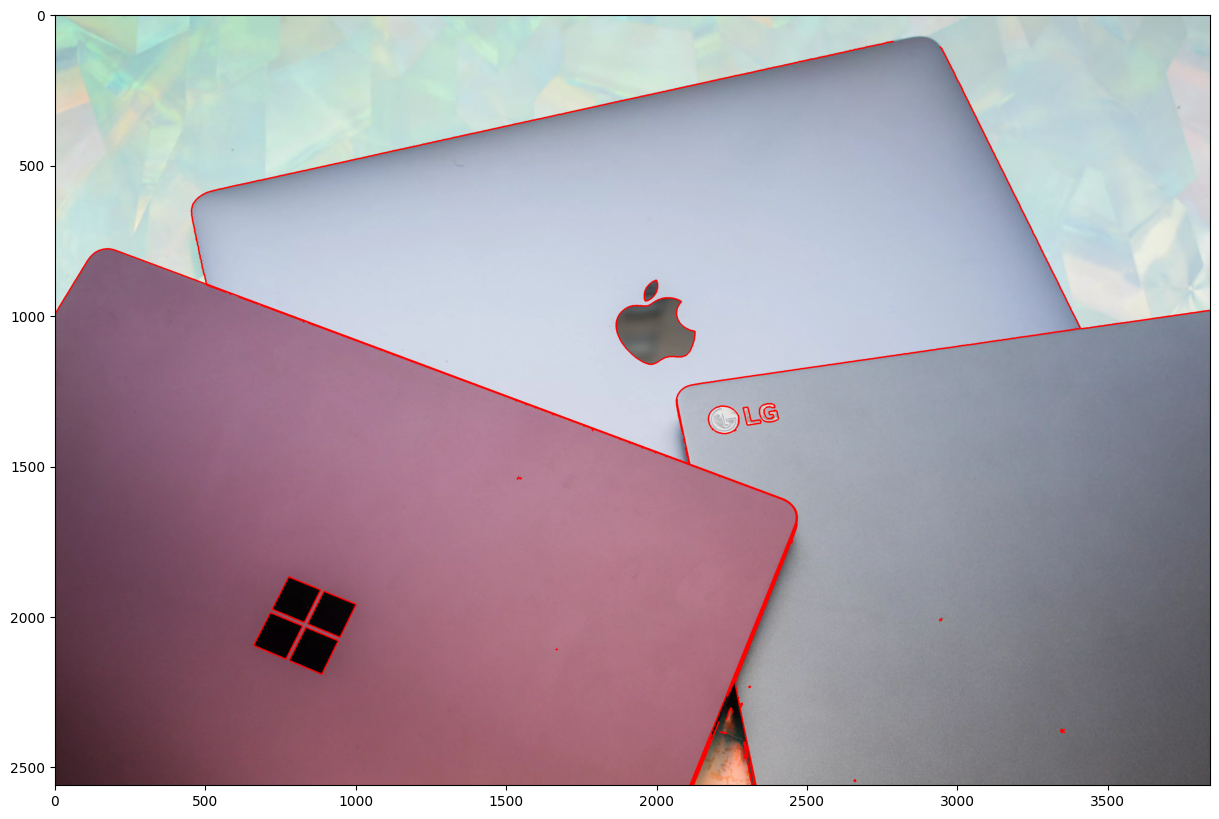

In [9]:
img = cv.imread('/content/drive/MyDrive/PCVK/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

### E. Pengayaan Materi KTP

1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

2. Muat 2 library berikut sebagai tahapan persiapan

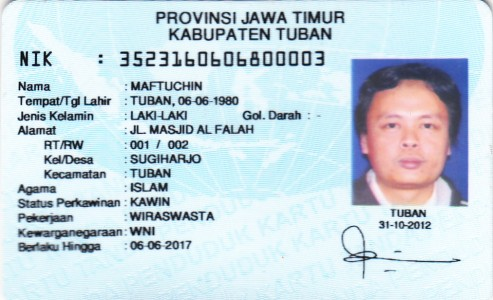

In [10]:
import cv2
from google.colab.patches import cv2_imshow
import os

img = cv2.imread('/content/drive/MyDrive/PCVK/ktp3.jpg')
cv2_imshow(img)

3. Tambahkan kode lokalisasi datase dan lakukan pembacaan file name dalam direktori dataset tersebut

In [11]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK"
img = "ktp3.jpg"
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    src = cv2.imread(os.path.join(path_plate, img))
    blurred = src.copy()
    gray = blurred.copy()

4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle
dapat direduksi

In [12]:
# Filtering
for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan
binerisasi citra (thresholding)

168.0 (300, 493)


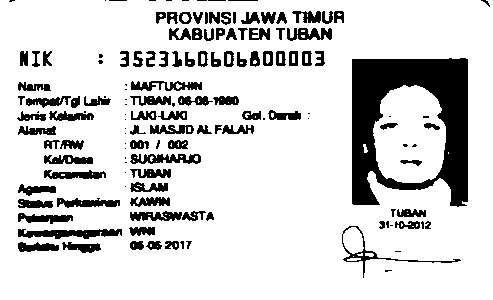

In [13]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)
cv2_imshow(bw)

6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter
atau obyek tidak berhimpitan.


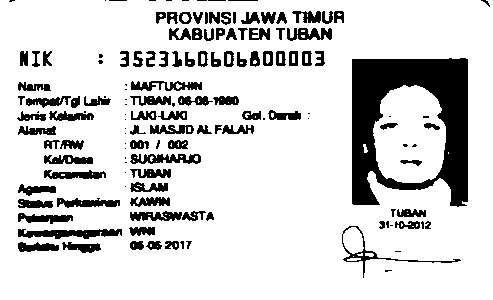

In [14]:
# Apply morphological operations (opening) to separate characters or objects
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
bw_opened = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)

# Display the result after morphological operations
cv2_imshow(bw_opened)

7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek.
Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di
dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu
penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran
dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain
terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik
(karena hasil akuisisi setiap citra dapat berbeda).

168.0 (300, 493)


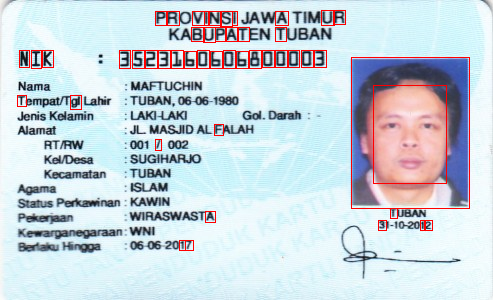

In [15]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK"
img = "ktp3.jpg"
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    src = cv2.imread(os.path.join(path_plate, img))
    blurred = src.copy()
    gray = blurred.copy()

# Filtering
for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

# Apply morphological operations (opening) to separate characters or objects
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
bw_opened = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)

contours,  hierarchy= cv2.findContours(bw, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada gambar asli
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Tampilkan gambar dengan kontur
cv2_imshow(src)

### F. Tugas Praktikum
Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP
untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing
yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan
secara berkelompok dengan aturan sebagai berikut: <br>
Kelompok 6 – KTP Abdurrauf Soppeng

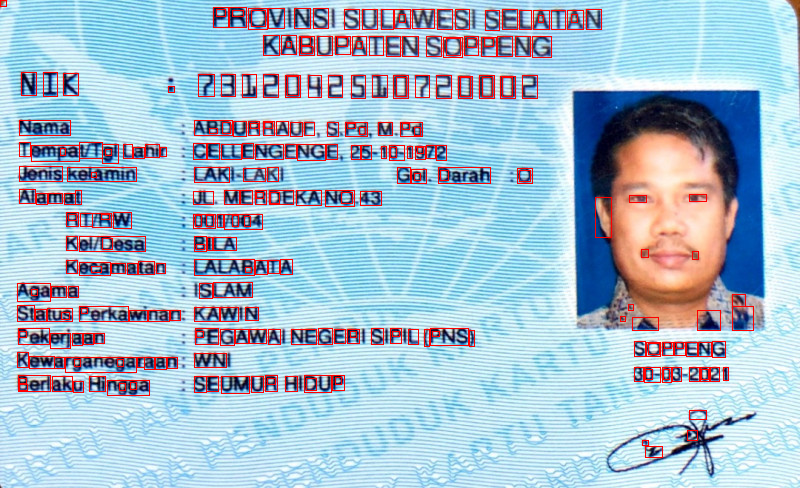

In [63]:
# Load the image
ktp = cv.imread("/content/drive/MyDrive/PCVK/KTP.jpg")

# Convert the image to grayscale
gray = cv.cvtColor(ktp, cv.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv.GaussianBlur(gray, (5, 5), 0.5)

# Apply thresholding to create a binary image
ret, thresholded = cv.threshold(blurred, 127, 255, cv.THRESH_BINARY_INV)

# Apply morphological operations (opening) to separate characters or objects
kernel = cv.getStructuringElement(cv.MORPH_RECT, (1, 1))
bw_opened = cv.morphologyEx(thresholded, cv.MORPH_OPEN, kernel)

# Find contours in the processed binary image
contours, hierarchy = cv.findContours(bw_opened, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

# Draw rectangles around contours that likely represent text
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    aspect_ratio = w / h

    # Modify the size and aspect ratio conditions to detect smaller text contours
    if 5 <= w <= 200 and 5 <= h <= 50 and 0.2 <= aspect_ratio <= 5.0:
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Display the image with contours marked
cv2_imshow(ktp)
